#### Vivian Xia
## Home Equity Line: PCA Experiment

## Import packages and data

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from operator import itemgetter
import math

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv("clean_HMEQ_Loss.csv")

In [5]:
TARGET_FLAG = 'TARGET_BAD_FLAG'
TARGET_LOSS = 'TARGET_LOSS_AMT'

## Preprocess data

In [6]:
df1 = df.copy()
df1 = df1.drop( [TARGET_FLAG], axis=1 ) #drop target variable
df1 = df1.drop( [TARGET_LOSS], axis=1 ) 
varNames = df1.columns

print( df1.head() )

   M_MORTDUE  M_VALUE  M_YOJ  M_DEROG  M_DELINQ  M_CLAGE  M_NINQ  M_CLNO  \
0          0        0      0        0         0        0       0       0   
1          0        0      0        0         0        0       0       0   
2          0        0      0        0         0        0       0       0   
3          1        1      1        1         1        1       1       1   
4          0        0      0        0         0        0       0       0   

   M_DEBTINC  O_LOAN  TRUNC_LOAN  O_IMP_MORTDUE  TRUNC_IMP_MORTDUE  \
0          1       0        1100              0            25860.0   
1          1       0        1300              0            70053.0   
2          1       0        1500              0            13500.0   
3          1       0        1500              0            65019.0   
4          1       0        1700              0            97800.0   

   O_IMP_VALUE  TRUNC_IMP_VALUE  O_IMP_YOJ  TRUNC_IMP_YOJ  O_IMP_DEROG  \
0            0          39025.0          0      

In [9]:
dt = df1.dtypes
numList = []
for i in dt.index :
    if i in ( [ TARGET_FLAG, TARGET_LOSS ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

print(" NUMBER ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")

 NUMBER 
 ------- 
M_MORTDUE
M_VALUE
M_YOJ
M_DEROG
M_DELINQ
M_CLAGE
M_NINQ
M_CLNO
M_DEBTINC
O_LOAN
TRUNC_LOAN
O_IMP_MORTDUE
TRUNC_IMP_MORTDUE
O_IMP_VALUE
TRUNC_IMP_VALUE
O_IMP_YOJ
TRUNC_IMP_YOJ
O_IMP_DEROG
TRUNC_IMP_DEROG
O_IMP_DELINQ
TRUNC_IMP_DELINQ
O_IMP_CLAGE
TRUNC_IMP_CLAGE
O_IMP_NINQ
TRUNC_IMP_NINQ
O_IMP_CLNO
TRUNC_IMP_CLNO
O_IMP_DEBTINC
TRUNC_IMP_DEBTINC
z_IMP_REASON_HomeImp
z_IMP_REASON_MISSING
z_IMP_JOB_Mgr
z_IMP_JOB_Office
z_IMP_JOB_Other
z_IMP_JOB_ProfExe
z_IMP_JOB_Sales
z_IMP_JOB_Self
 ------- 


In [11]:
truncList = [x for x in numList if x.startswith("TRUNC_")]
truncList

['TRUNC_LOAN',
 'TRUNC_IMP_MORTDUE',
 'TRUNC_IMP_VALUE',
 'TRUNC_IMP_YOJ',
 'TRUNC_IMP_DEROG',
 'TRUNC_IMP_DELINQ',
 'TRUNC_IMP_CLAGE',
 'TRUNC_IMP_NINQ',
 'TRUNC_IMP_CLNO',
 'TRUNC_IMP_DEBTINC']

In [12]:
X = df1.copy() 
X = X[truncList]
varNames = X.columns 

print( X.head().T )
print( "\n\n")
print( X.describe() )

                              0             1             2             3  \
TRUNC_LOAN          1100.000000   1300.000000   1500.000000   1500.000000   
TRUNC_IMP_MORTDUE  25860.000000  70053.000000  13500.000000  65019.000000   
TRUNC_IMP_VALUE    39025.000000  68400.000000  16700.000000  89235.500000   
TRUNC_IMP_YOJ         10.500000      7.000000      4.000000      7.000000   
TRUNC_IMP_DEROG        0.000000      0.000000      0.000000      0.000000   
TRUNC_IMP_DELINQ       0.000000      2.000000      0.000000      0.000000   
TRUNC_IMP_CLAGE       94.366667    121.833333    149.466667    173.466667   
TRUNC_IMP_NINQ         1.000000      0.000000      1.000000      1.000000   
TRUNC_IMP_CLNO         9.000000     14.000000     10.000000     20.000000   
TRUNC_IMP_DEBTINC     34.818262     34.818262     34.818262     34.818262   

                               4  
TRUNC_LOAN           1700.000000  
TRUNC_IMP_MORTDUE   97800.000000  
TRUNC_IMP_VALUE    112000.000000  
TRUNC_IMP_YO

In [13]:
# standardize the data
theScaler = StandardScaler()
theScaler.fit( X )

Y_STD = theScaler.transform( X )
Y_STD = pd.DataFrame( Y_STD )
print( Y_STD.head() )


          0         1         2         3         4         5         6  \
0 -1.701029 -1.187821 -1.218785  0.243923 -0.329584 -0.418963 -1.067294   
1 -1.681321 -0.055078 -0.636046 -0.241631 -0.329584  1.837718 -0.718939   
2 -1.661613 -1.504630 -1.661666 -0.657820 -0.329584 -0.418963 -0.368469   
3 -1.661613 -0.184108 -0.222713 -0.241631 -0.329584 -0.418963 -0.064081   
4 -1.641905  0.656126  0.228887 -0.796550 -0.329584 -0.418963 -1.080400   

          7         8         9  
0 -0.081701 -1.247113  0.141543  
1 -0.791521 -0.736029  0.141543  
2 -0.081701 -1.144896  0.141543  
3 -0.081701 -0.122729  0.141543  
4 -0.791521 -0.736029  0.141543  


In [14]:
varNames_std = []
for i in varNames :
    newName = "std_" + i
    varNames_std.append( newName )

Y_STD.columns = varNames_std
print( Y_STD.head() )
print( "\n\n")
print( Y_STD.describe() )

   std_TRUNC_LOAN  std_TRUNC_IMP_MORTDUE  std_TRUNC_IMP_VALUE  \
0       -1.701029              -1.187821            -1.218785   
1       -1.681321              -0.055078            -0.636046   
2       -1.661613              -1.504630            -1.661666   
3       -1.661613              -0.184108            -0.222713   
4       -1.641905               0.656126             0.228887   

   std_TRUNC_IMP_YOJ  std_TRUNC_IMP_DEROG  std_TRUNC_IMP_DELINQ  \
0           0.243923            -0.329584             -0.418963   
1          -0.241631            -0.329584              1.837718   
2          -0.657820            -0.329584             -0.418963   
3          -0.241631            -0.329584             -0.418963   
4          -0.796550            -0.329584             -0.418963   

   std_TRUNC_IMP_CLAGE  std_TRUNC_IMP_NINQ  std_TRUNC_IMP_CLNO  \
0            -1.067294           -0.081701           -1.247113   
1            -0.718939           -0.791521           -0.736029   
2       

The values are all within -5 and 5.

## Principal Componenet Analysis

In [15]:
MAX_N = Y_STD.shape[1] #tell us how many variables

#create PCs
pca = PCA(n_components=MAX_N) #create the same number of original variables
pca.fit( Y_STD )

PCA(n_components=10)

In [16]:
#look at eigen values - how much information in each PC
ev = pca.explained_variance_
print("Eigen Values")
print(ev)

Eigen Values
[2.30966483 1.44091702 1.24662653 0.99190482 0.9764483  0.81912973
 0.75599913 0.70855456 0.60291039 0.14952284]


In [17]:
varPCT = []
totPCT = []
total = 0
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int( total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append( PCT )
    print( round(i,2), "variation=", VAR,"%"," total=", PCT,"%")

2.31 variation= 23 %  total= 23 %
1.44 variation= 14 %  total= 37 %
1.25 variation= 12 %  total= 49 %
0.99 variation= 9 %  total= 59 %
0.98 variation= 9 %  total= 69 %
0.82 variation= 8 %  total= 77 %
0.76 variation= 7 %  total= 85 %
0.71 variation= 7 %  total= 92 %
0.6 variation= 6 %  total= 98 %
0.15 variation= 1 %  total= 100 %


PC1 has as much information as 2.31 variables. PC1 has 23% of the total information.

With PC1 and PC2, we can get 37% of the total information. With PC1, PC2, PC3, PC4, PC5, PC6, PC7, and PC8, we can get 92% of the total information.

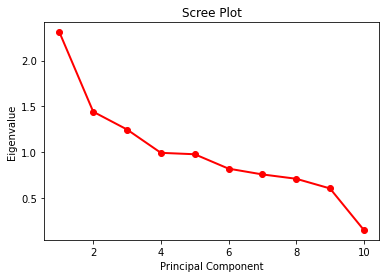

In [18]:
#create Scree Plot
PC_NUM = np.arange( MAX_N ) + 1 
plt.plot( PC_NUM , ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

This plot shows the eigenvalues of each principal component. In the plot, we can see that PC1 has as much information as approximately 2.5 variables. From the analysis, we know that is true and the more exact value is 2.31 variables worth of information for PC1. The plot as well as the analysis shows that around PC4 is when the principal components start to have less than 1 variable’s worth of information. The plot starts to flatten out at PC6.

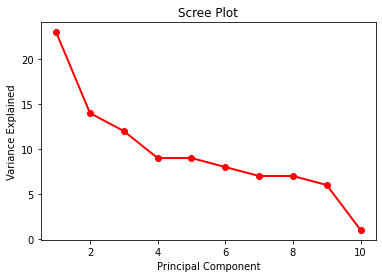

In [19]:
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , varPCT, 'ro-', linewidth=2) #use the percentage of the total information instead
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

This scree plot looks at the percentage of the total information that each principal component has. This plot also starts to flatten out at PC6.

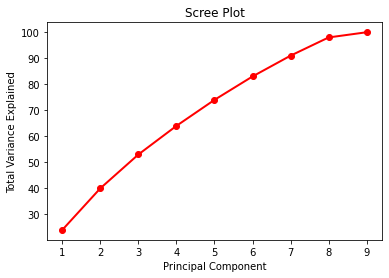

In [ ]:
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , totPCT, 'ro-', linewidth=2) #use running total percentage of information
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()

This scree plot looks at the running total percentage of information.

After looking at the scree plots, I decided to use PC1, PC2, PC3, PC4, PC5, and PC6 to get 77% of the total information.

In [22]:
dfc = pd.DataFrame( pca.components_ ) #get pc and weights
dfc.columns = list( X.columns)
dfc = dfc.iloc[0:6,:]

dfc = dfc.set_axis(['PC1','PC2','PC3','PC4','PC5','PC6'], axis=0)

print( dfc.T )

                        PC1       PC2       PC3       PC4       PC5       PC6
TRUNC_LOAN         0.312431 -0.073553 -0.057015  0.438495  0.550313 -0.070670
TRUNC_IMP_MORTDUE  0.567440 -0.023531 -0.216427 -0.233172  0.031429 -0.063663
TRUNC_IMP_VALUE    0.582819 -0.090080 -0.167478 -0.146245  0.145871 -0.090940
TRUNC_IMP_YOJ      0.030262 -0.270771  0.543490  0.451810  0.162240 -0.272340
TRUNC_IMP_DEROG   -0.026978  0.513339  0.185554 -0.174621  0.477556  0.074149
TRUNC_IMP_DELINQ   0.040892  0.388901  0.490885 -0.330237  0.064193 -0.395189
TRUNC_IMP_CLAGE    0.233359 -0.299132  0.491599  0.005192 -0.186632  0.418365
TRUNC_IMP_NINQ     0.062175  0.512781 -0.076221  0.450624  0.013720  0.517797
TRUNC_IMP_CLNO     0.380114  0.186995  0.304926 -0.084332 -0.346294  0.258608
TRUNC_IMP_DEBTINC  0.186001  0.332344 -0.103060  0.421999 -0.511320 -0.486642


The weights of each principal component in each variable are shown in the figure above. PC1 is made up of larger TRUNC_IMP_MORTDUE, TRUNC_IMP_VALUE, so it looks at larger values in TRUNC_IMP_MORTDUE and TRUNC_IMP_VALUE. PC2 has a larger TRUNC_IMP_NINQ and TRUNC_IMP_DEROG component, so PC2 looks at larger values in those two variables. 

In [23]:
X_PCA = pca.transform( Y_STD )
X_PCA = pd.DataFrame( X_PCA )
X_PCA = X_PCA.iloc[:,0:5] #would like to get all the rows and PC1,PC2,PC3,PC4,PC5 to get 74% of the info

#add column names
colNames = X_PCA.columns
pcaNames = []
for i in colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    pcaNames.append( theName )

X_PCA.columns = pcaNames

print( X_PCA.head() )

       PC_1      PC_2      PC_3      PC_4      PC_5
0 -2.618522 -0.044113 -0.489385  0.137976 -0.738367
1 -1.320955  0.511772  0.391813 -1.528501 -0.792567
2 -2.869454  0.054577 -0.464272 -0.118509 -1.103355
3 -0.809322 -0.118721 -0.303545 -0.533439 -1.195207
4 -0.594399 -0.205020 -1.496273 -1.310896 -0.789788


In [29]:
#add target variables back in
X_PCA[ "TARGET_BAD_FLAG" ] = df['TARGET_BAD_FLAG']
X_PCA[ "TARGET_LOSS_AMT" ] = df['TARGET_LOSS_AMT']

#add missing and former categorical variables back in
missing_obj_List = [x for x in numList if x.startswith("z_") | x.startswith("M_")]
for i in missing_obj_List:
    X_PCA[i] = df[i]
    
print( X_PCA.head() )

       PC_1      PC_2      PC_3      PC_4      PC_5  TARGET_BAD_FLAG  \
0 -2.618522 -0.044113 -0.489385  0.137976 -0.738367                1   
1 -1.320955  0.511772  0.391813 -1.528501 -0.792567                1   
2 -2.869454  0.054577 -0.464272 -0.118509 -1.103355                1   
3 -0.809322 -0.118721 -0.303545 -0.533439 -1.195207                1   
4 -0.594399 -0.205020 -1.496273 -1.310896 -0.789788                0   

   TARGET_LOSS_AMT  M_MORTDUE  M_VALUE  M_YOJ  M_DEROG  M_DELINQ  M_CLAGE  \
0            641.0          0        0      0        0         0        0   
1           1109.0          0        0      0        0         0        0   
2            767.0          0        0      0        0         0        0   
3           1425.0          1        1      1        1         1        1   
4              NaN          0        0      0        0         0        0   

   M_NINQ  M_CLNO  M_DEBTINC  z_IMP_REASON_HomeImp  z_IMP_REASON_MISSING  \
0       0       0          1

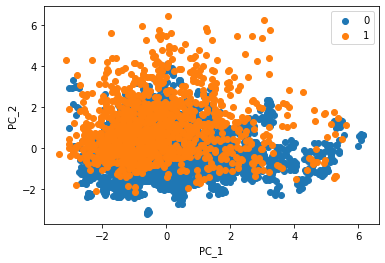

In [30]:
for Name, Group in X_PCA.groupby(TARGET_FLAG):
    plt.scatter(Group.PC_1, Group.PC_2, label=Name)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()

The plot shows that if the PC_1 value is greater than 5, then the loan will most likely not default. If the PC_2 value is larger than 4, then the loan is more likely to default. If the PC_2 value is less than -2, then the loan will more likely not default.

### Model Accuracy Metrics

In [40]:
def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

In [41]:
def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [42]:
def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

In [43]:
def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]

In [32]:
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

### Split Data

In [35]:
X_PCA.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,TARGET_BAD_FLAG,TARGET_LOSS_AMT,M_MORTDUE,M_VALUE,M_YOJ,M_DEROG,M_DELINQ,M_CLAGE,M_NINQ,M_CLNO,M_DEBTINC,z_IMP_REASON_HomeImp,z_IMP_REASON_MISSING,z_IMP_JOB_Mgr,z_IMP_JOB_Office,z_IMP_JOB_Other,z_IMP_JOB_ProfExe,z_IMP_JOB_Sales,z_IMP_JOB_Self
0,-2.618522,-0.044113,-0.489385,0.137976,-0.738367,1,641.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
1,-1.320955,0.511772,0.391813,-1.528501,-0.792567,1,1109.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,-2.869454,0.054577,-0.464272,-0.118509,-1.103355,1,767.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
3,-0.809322,-0.118721,-0.303545,-0.533439,-1.195207,1,1425.0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0
4,-0.594399,-0.205020,-1.496273,-1.310896,-0.789788,0,NaN,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


In [36]:
X = X_PCA.copy()
X = X.drop( TARGET_FLAG, axis=1 )
X = X.drop( TARGET_LOSS, axis=1 )

Y = X_PCA[ [TARGET_FLAG, TARGET_LOSS] ]

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )

FLAG DATA
TRAINING =  (4768, 22)
TEST =  (1192, 22)


In [38]:
F = ~ Y_train[TARGET_LOSS].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_LOSS ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

## Random Forest

### Loan Default Probability

In [44]:
WHO = "RF"

CLM = RandomForestClassifier( n_estimators = 25, random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_FLAG ] )

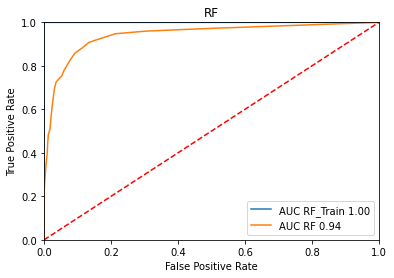

RF CLASSIFICATION ACCURACY
RF_Train  =  0.9987416107382551
RF  =  0.9026845637583892
------




In [45]:
print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

In [48]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( CLM, feature_cols )

for i in vars_RF_flag :
    print( i )

('PC_2', 100)
('M_DEBTINC', 93)
('PC_3', 56)
('PC_1', 54)
('PC_5', 51)
('PC_4', 46)


The Random Forest did about the same as the original way without PCA, with an accurancy of 0.01 less. It may be best to continue using the original way because it is more explainable and can also predict well. But notably, it able to predict well despite using only 77% of the information.

### Loss Amount

In [51]:
AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

RF RMSE ACCURACY
RF_Train  =  2385.600340747146
RF  =  6762.590466358603
------




The original data did better than using the PCA. The orignal data's RMSE was 3500. 


In [52]:
feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
    print( i )

('PC_1', 100)
('PC_5', 35)
('PC_4', 26)
('PC_2', 22)
('PC_3', 12)
('z_IMP_REASON_HomeImp', 11)


In [53]:
RF_CLM = TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()

## Gradient Boosting

### Loan Default Probability

In [54]:
WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_FLAG ] )

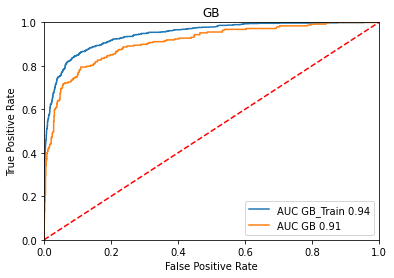

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9121224832214765
GB  =  0.8901006711409396
------




In [55]:
print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

Similar to RF, the original data model for GB did better but not by much.

In [56]:
feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )

for i in vars_GB_flag :
    print( i )

('M_DEBTINC', 100)
('PC_2', 37)
('PC_3', 11)
('PC_5', 9)
('PC_1', 8)
('M_VALUE', 8)


### Loss Amount

In [57]:
AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

GB RMSE ACCURACY
GB_Train  =  4113.160850593021
GB  =  7106.431684145675
------




The original data does a much better job at a RMSE score in the 2000's. 

In [58]:
feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_GB_amt :
    print( i )

('PC_1', 100)
('PC_5', 32)
('PC_4', 21)
('PC_2', 18)
('z_IMP_REASON_HomeImp', 13)


In [59]:
GB_CLM = TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()

## Compare Tree Based Models

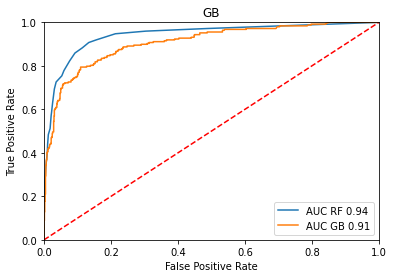

ALL CLASSIFICATION ACCURACY
RF  =  0.9026845637583892
GB  =  0.8901006711409396
------




In [60]:
ALL_CLM = [ RF_CLM, GB_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )

In [61]:
ALL_AMT = [ RF_AMT, GB_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL DAMAGE MODEL ACCURACY", ALL_AMT )

ALL DAMAGE MODEL ACCURACY
RF  =  6762.590466358603
GB  =  7106.431684145675
------




Using PCA did a good job with predicting loan default with only 77% of the information. However, it did not improve or get similar RMSE scores for predicting loss amount. 

Because the number of variables in the original RF and GB models were not overwhelming, I would recommend continuing to use those models. 